# Importing Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../Original Data/customer_churn_dataset-training-master.csv')

In [4]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
46955,47609.0,26.0,Female,3.0,4.0,5.0,28.0,Premium,Quarterly,716.00,13.0,1.0
18301,18310.0,47.0,Female,34.0,6.0,6.0,13.0,Basic,Monthly,316.00,18.0,1.0
137940,142556.0,52.0,Female,25.0,14.0,0.0,2.0,Basic,Quarterly,822.00,10.0,1.0
292269,299383.0,27.0,Male,58.0,16.0,2.0,19.0,Standard,Annual,895.93,5.0,0.0
140907,145650.0,57.0,Female,8.0,2.0,0.0,12.0,Basic,Annual,769.00,16.0,1.0


In [5]:

df_dict=pd.read_excel('../Original Data/Dictionary.xlsx')


In [6]:
df_dict.set_index('Column',inplace=True)

In [7]:
df_dict

,Description
Column,
CustomerID,A unique identifier for each customer
Age,The age of the customer
Gender,Gender of the customer
Tenure,Duration in months for which a customer has be...
Usage Frequency,Number of times that the customer has used the...
Support Calls,Number of calls that the customer has made to ...
Payment Delay,Number of days that the customer has delayed t...
Subscription Type,Type of subscription the customer has choosen
Contract Length,Duration of the contract that the customer has...


In [8]:
df_dict.loc['Age']

Description     The age of the customer
Name: Age, dtype: object

# Preprcossing

In [9]:
print('Number Of Rows :',df.shape[0])
print('Number Of Columns :',df.shape[1])

Number Of Rows : 440833
Number Of Columns : 12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [11]:
df[df.isnull().all(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df=df.dropna(how='all')

In [13]:
str_cols=['Gender','Subscription Type','Contract Length']
for col in str_cols:
    df[col] = df[col].str.strip()

In [14]:
num_cols = ['CustomerID','Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction', 'Churn']
for col in num_cols:
    df[col]=df[col].astype(int)

In [15]:
df.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

In [16]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['CustomerID'].duplicated().sum()

np.int64(0)

In [19]:
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction', 'Churn','Total Spend']

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower) | (df[col] > upper)][col]
  print(f"{col}: {len(outliers)} outliers")



Age: 0 outliers
Tenure: 0 outliers
Usage Frequency: 0 outliers
Support Calls: 0 outliers
Payment Delay: 0 outliers
Last Interaction: 0 outliers
Churn: 0 outliers
Total Spend: 0 outliers


### Normalization

In [20]:
Sub_Type = {
    'Standard': 1,
    'Basic': 2,
    'Premium': 3
}

df['Subscription Type ID'] = df['Subscription Type'].map(Sub_Type)

In [21]:
df[['Subscription Type ID','Subscription Type']]

,Subscription Type ID,Subscription Type
0,1,Standard
1,2,Basic
2,2,Basic
3,1,Standard
4,2,Basic
...,...,...
440828,3,Premium
440829,3,Premium
440830,1,Standard
440831,1,Standard


In [22]:
Contract_len = {
    'Monthly': 1,
    'Quarterly': 2,
    'Annual': 3
}

df['Contract Length ID'] = df['Contract Length'].map(Contract_len)

In [23]:
df[['Contract Length ID','Contract Length']]

,Contract Length ID,Contract Length
0,3,Annual
1,1,Monthly
2,2,Quarterly
3,1,Monthly
4,1,Monthly
...,...,...
440828,3,Annual
440829,3,Annual
440830,2,Quarterly
440831,2,Quarterly


In [24]:
Fact_Customer_Churn=df.loc[:,['CustomerID',                              # Table 1
                    'Tenure',
                    'Usage Frequency',
                    'Support Calls',
                    'Payment Delay',
                    'Total Spend',
                    'Last Interaction',
                    'Churn',
                    'Subscription Type ID',
                    'Contract Length ID']]

In [25]:
Fact_Customer_Churn

,CustomerID,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type ID,Contract Length ID
0,2,39,14,5,18,932.00,17,1,1,3
1,3,49,1,10,8,557.00,6,1,2,1
2,4,14,4,6,18,185.00,3,1,2,2
3,5,38,21,7,7,396.00,29,1,1,1
4,6,32,20,5,8,617.00,20,1,2,1
...,...,...,...,...,...,...,...,...,...,...
440828,449995,54,15,1,3,716.38,8,0,3,3
440829,449996,8,13,1,20,745.38,2,0,3,3
440830,449997,35,27,1,5,977.31,9,0,1,2
440831,449998,55,14,2,0,602.55,2,0,1,2


In [26]:
Dim_Customer = df[['CustomerID', 'Age', 'Gender']].drop_duplicates()         # Table 2

In [27]:
Dim_Customer

,CustomerID,Age,Gender
0,2,30,Female
1,3,65,Female
2,4,55,Female
3,5,58,Male
4,6,23,Male
...,...,...,...
440828,449995,42,Male
440829,449996,25,Female
440830,449997,26,Male
440831,449998,28,Male


In [28]:
Dim_Subscription = df[['Subscription Type ID','Subscription Type']].drop_duplicates().reset_index(drop=True) # Table 3
# reset index --> because the previous indices was 0 1 5

In [29]:
Dim_Subscription

,Subscription Type ID,Subscription Type
0,1,Standard
1,2,Basic
2,3,Premium


In [30]:
Dim_Contract = df[['Contract Length ID','Contract Length']].drop_duplicates().sort_values('Contract Length ID').reset_index(drop=True)
# Table 4

In [31]:
Dim_Contract

,Contract Length ID,Contract Length
0,1,Monthly
1,2,Quarterly
2,3,Annual


In [32]:
Dim_Contract.dtypes

Contract Length ID     int64
Contract Length       object
dtype: object

In [33]:
# with pd.ExcelWriter('Cleaned_Customer_Churn_Dataset.xlsx', engine='xlsxwriter') as writer:
#     Fact_Customer_Churn.to_excel(writer, sheet_name='Fact_Customer_Churn', index=False)
#     Dim_Customer.to_excel(writer, sheet_name='Dim_Customer', index=False)
#     Dim_Subscription.to_excel(writer, sheet_name='Dim_Subscription', index=False)
#     Dim_Contract.to_excel(writer, sheet_name='Dim_Contract', index=False)

# Data Exploration

In [34]:
df.loc[:, df.columns != 'CustomerID'].describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type ID,Contract Length ID
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107,1.998979,2.204373
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477,0.821921,0.746851
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000,1.000000,2.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000,2.000000,2.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000,3.000000,3.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,3.000000,3.000000


In [65]:
(df['Subscription Type'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Subscription Type
Standard    33.8%
Premium     33.7%
Basic       32.4%
Name: proportion, dtype: object

In [67]:
(df.loc[df['Churn']==1,'Subscription Type'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Subscription Type
Standard    33.4%
Basic       33.3%
Premium     33.3%
Name: proportion, dtype: object

<Figure size 900x600 with 0 Axes>

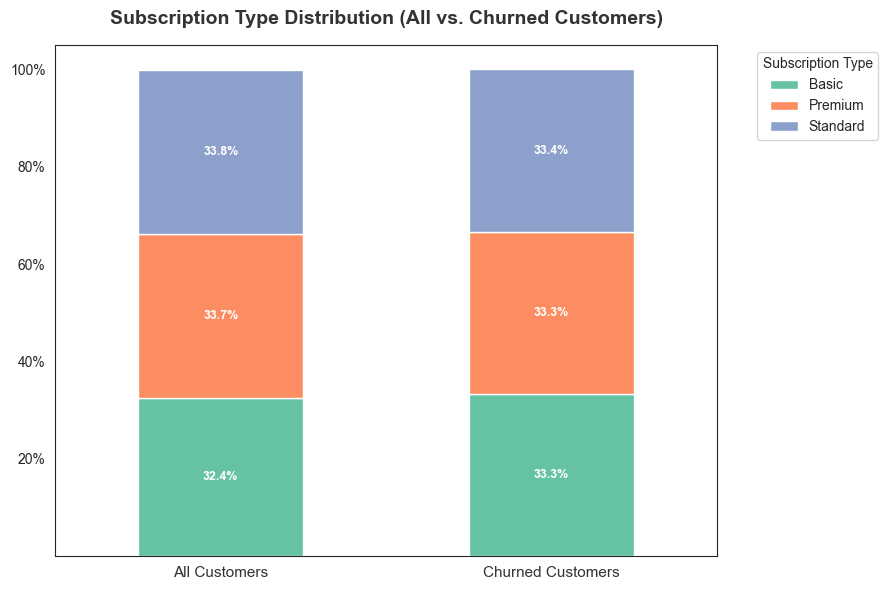

In [76]:
all_sub = (df['Subscription Type'].value_counts(normalize=True) * 100).round(1)
churn_sub = (df.loc[df['Churn'] == 1, 'Subscription Type'].value_counts(normalize=True) * 100).round(1)

# --- دمجهم في DataFrame واحد ---
compare_df = pd.DataFrame({
    'All Customers': all_sub,
    'Churned Customers': churn_sub
}).fillna(0)

# --- إنشاء الشكل ---
plt.figure(figsize=(9,6))
sns.set_style("white")

# رسم الـ stacked bar chart
ax = compare_df.T.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2"),
    edgecolor='white',
    figsize=(9,6)
)

# --- تنسيقات احترافية ---
plt.title("Subscription Type Distribution (All vs. Churned Customers)", 
          fontsize=14, fontweight='bold', color='#333333', pad=15)

# إزالة gridlines
plt.grid(False)

# إزالة ylabel
plt.ylabel("")

# xticks بالعرض (أفقية)
plt.yticks([20,40,60,80,100],['20%','40%','60%','80%','100%'])
plt.xticks(rotation=0, fontsize=11, color='#333333')

# تنسيق legend
plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# --- عرض النسب داخل الأعمدة مع علامة % ---
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container],
        label_type='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [61]:
(df['Gender'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'

Gender
Male      56.8%
Female    43.2%
Name: proportion, dtype: object

In [63]:
(df.loc[df['Churn']==1,'Gender'].value_counts(normalize=True)*100).sort_values().round(1).astype(str) + '%'

Gender
Male      49.2%
Female    50.8%
Name: proportion, dtype: object

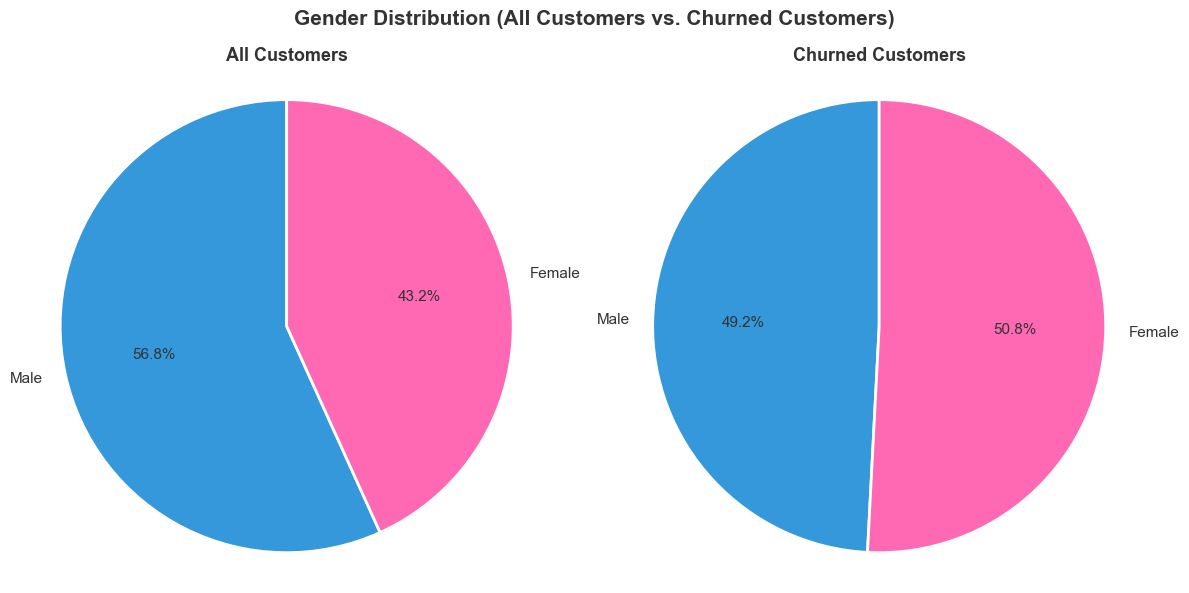

In [99]:
gender_all = df['Gender'].value_counts()
gender_churn = df.loc[df['Churn']==1,'Gender'].value_counts(normalize=True).sort_values() # sorting علشان يبقي male الاول و بعدين female علشان يطلع نتيجه مظبوطه

colors = ['#3498db', '#ff69b4']

fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Gender Distribution (All Customers vs. Churned Customers)", 
             fontsize=15, fontweight='bold', color='#333333', y=0.98)

axes[0].pie(
    gender_all.values,
    labels=gender_all.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'color': '#333333'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title("All Customers", fontsize=13, fontweight='bold', color='#333333')

axes[1].pie(
    gender_churn.values,
    labels=gender_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'color': '#333333'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].set_title("Churned Customers", fontsize=13, fontweight='bold', color='#333333')

for ax in axes:
    ax.axis('equal')

plt.tight_layout()
plt.show()

In [77]:
(df['Contract Length'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Contract Length
Annual       40.2%
Quarterly    40.0%
Monthly      19.8%
Name: proportion, dtype: object

In [78]:
(df.loc[df['Churn']==1,'Contract Length'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Contract Length
Monthly      34.8%
Annual       32.7%
Quarterly    32.5%
Name: proportion, dtype: object

<Figure size 900x600 with 0 Axes>

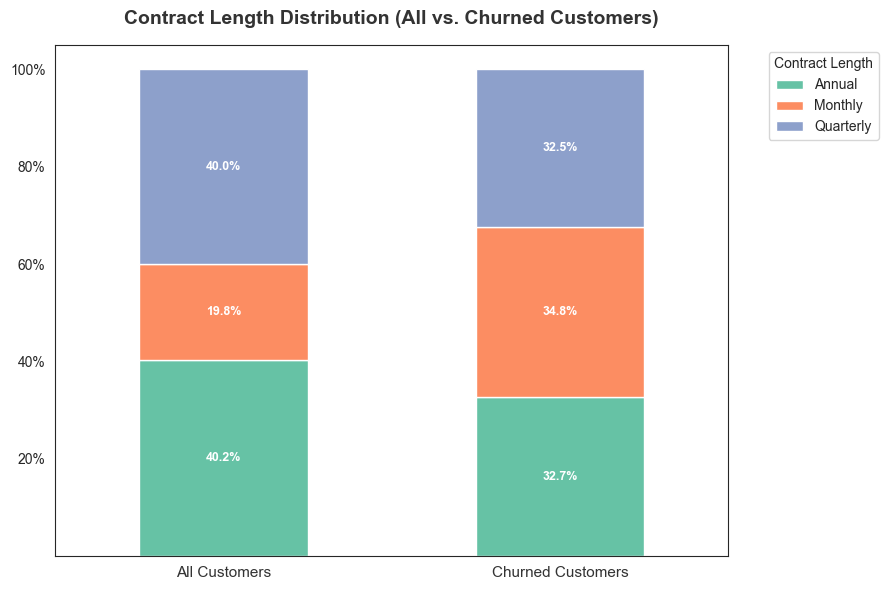

In [ ]:
all_con = (df['Contract Length'].value_counts(normalize=True)*100).round(1)
churn_con = (df.loc[df['Churn']==1,'Contract Length'].value_counts(normalize=True)*100).round(1)

compare_df = pd.DataFrame({
    'All Customers': all_con,
    'Churned Customers': churn_con
}).fillna(0)

plt.figure(figsize=(9,6))
sns.set_style("white")

ax = compare_df.T.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2"),
    edgecolor='white',
    figsize=(9,6)
)

plt.title("Contract Length Distribution (All vs. Churned Customers)", 
          fontsize=14, fontweight='bold', color='#333333', pad=15)

plt.grid(False)

plt.ylabel("")

plt.yticks([20,40,60,80,100],['20%','40%','60%','80%','100%'])
plt.xticks(rotation=0, fontsize=11, color='#333333')

plt.legend(title="Contract Length", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container],
        label_type='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )


plt.tight_layout()
plt.show()

In [ ]:
df_dict.loc['Last Interaction'].to_list()

['\xa0Number of days since the last interaction that the customer had with the company']

# EDA

In [87]:
(df.loc[df['Churn'] == 0, 'Subscription Type'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'

Subscription Type
Standard    34.3%
Premium     34.3%
Basic       31.3%
Name: proportion, dtype: object

In [88]:
(df.loc[df['Churn'] == 1, 'Subscription Type'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'

Subscription Type
Standard    33.4%
Basic       33.3%
Premium     33.3%
Name: proportion, dtype: object

<Figure size 900x600 with 0 Axes>

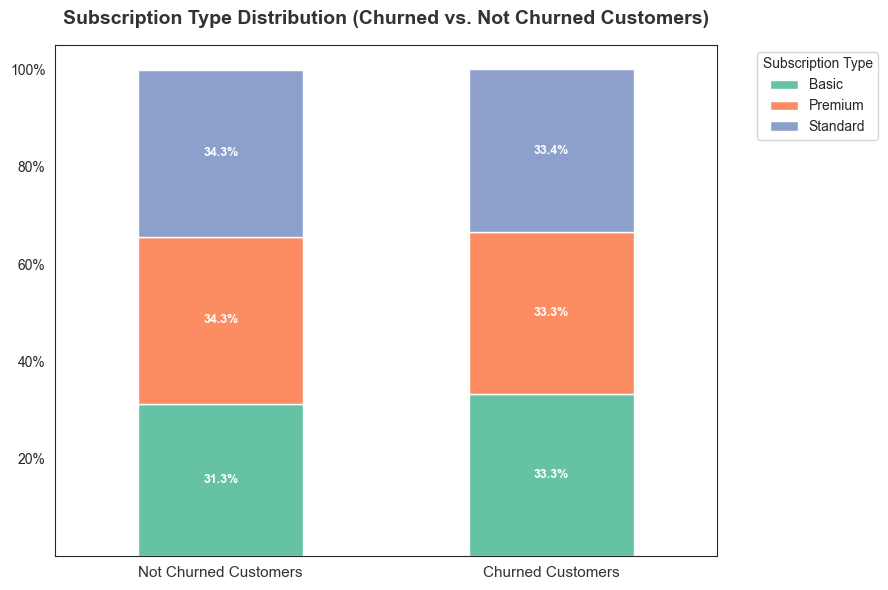

In [ ]:
not_churn_sub = (df.loc[df['Churn'] == 0, 'Subscription Type'].value_counts(normalize=True) * 100).round(1)
churn_sub = (df.loc[df['Churn'] == 1, 'Subscription Type'].value_counts(normalize=True) * 100).round(1)

compare_df = pd.DataFrame({
    'Not Churned Customers': not_churn_sub,
    'Churned Customers': churn_sub
}).fillna(0)

plt.figure(figsize=(9,6))
sns.set_style("white")

ax = compare_df.T.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2"),
    edgecolor='white',
    figsize=(9,6)
)

plt.title("Subscription Type Distribution (Churned vs. Not Churned Customers)", 
          fontsize=14, fontweight='bold', color='#333333', pad=15)

plt.grid(False)

plt.ylabel("")

plt.yticks([20,40,60,80,100],['20%','40%','60%','80%','100%'])
plt.xticks(rotation=0, fontsize=11, color='#333333')

plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container],
        label_type='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [ ]:
(df.loc[df['Churn'] == 0, 'Contract Length'].value_counts(normalize=True) * 100).round(1).astype(str) + '%' #The most important insight

Contract Length
Annual       50.1%
Quarterly    49.9%
Name: proportion, dtype: object

In [91]:
(df.loc[df['Churn'] == 1, 'Contract Length'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'

Contract Length
Monthly      34.8%
Annual       32.7%
Quarterly    32.5%
Name: proportion, dtype: object

<Figure size 900x600 with 0 Axes>

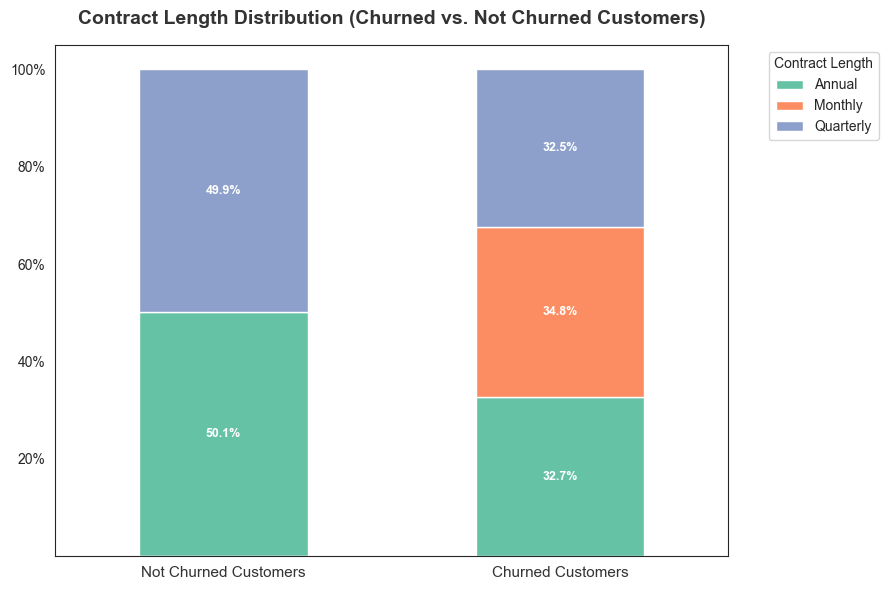

In [ ]:
not_churn_con = (df.loc[df['Churn'] == 0, 'Contract Length'].value_counts(normalize=True) * 100).round(1)
churn_con = (df.loc[df['Churn'] == 1, 'Contract Length'].value_counts(normalize=True) * 100).round(1)

compare_df = pd.DataFrame({
    'Not Churned Customers': not_churn_con,
    'Churned Customers': churn_con
}).fillna(0)

plt.figure(figsize=(9,6))
sns.set_style("white")

ax = compare_df.T.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette("Set2"),
    edgecolor='white',
    figsize=(9,6)
)

plt.title("Contract Length Distribution (Churned vs. Not Churned Customers)", 
          fontsize=14, fontweight='bold', color='#333333', pad=15)

plt.grid(False)

plt.ylabel("")

plt.yticks([20,40,60,80,100],['20%','40%','60%','80%','100%'])
plt.xticks(rotation=0, fontsize=11, color='#333333')

plt.legend(title="Contract Length", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container],
        label_type='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [95]:
(df.loc[df['Churn']==0,'Gender'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Gender
Male      66.7%
Female    33.3%
Name: proportion, dtype: object

In [93]:
(df.loc[df['Churn']==1,'Gender'].value_counts(normalize=True)*100).round(1).astype(str) + '%'

Gender
Female    50.8%
Male      49.2%
Name: proportion, dtype: object

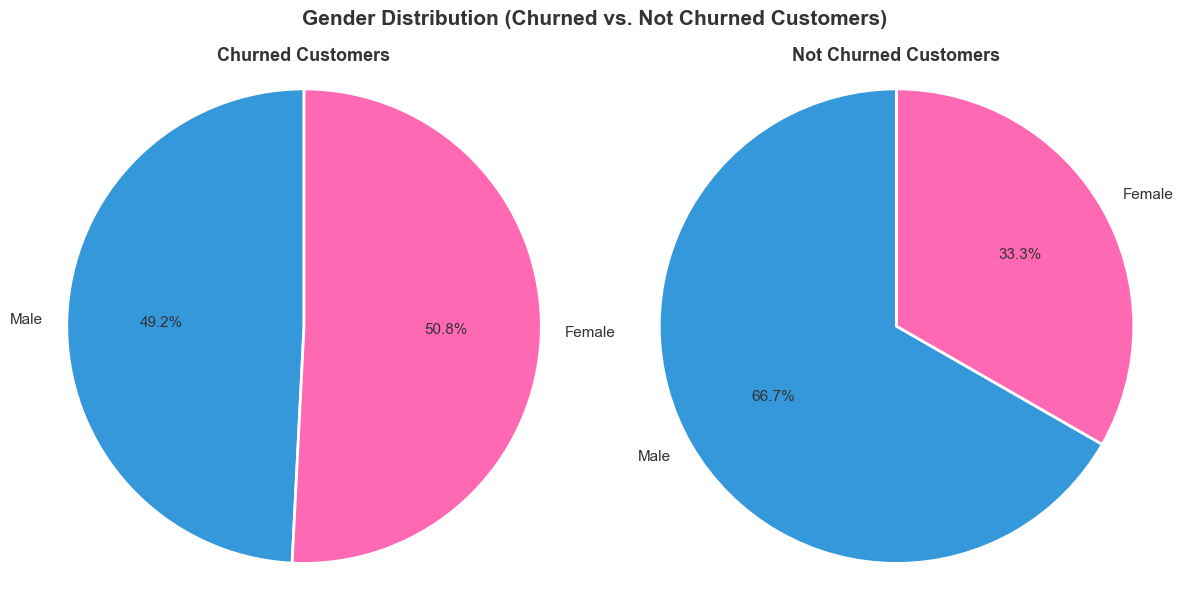

In [100]:
gender_not_churn = (df.loc[df['Churn'] == 0, 'Gender'].value_counts(normalize=True) * 100).round(1)
gender_churn = (df.loc[df['Churn'] == 1, 'Gender'].value_counts(normalize=True) * 100).round(1).sort_values()

colors = ['#3498db', '#ff69b4'] 

fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Gender Distribution (Churned vs. Not Churned Customers)", 
             fontsize=15, fontweight='bold', color='#333333', y=0.98)

axes[0].pie(
    gender_churn.values,
    labels=gender_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'color': '#333333'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title("Churned Customers", fontsize=13, fontweight='bold', color='#333333')

axes[1].pie(
    gender_not_churn.values,
    labels=gender_not_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'color': '#333333'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].set_title("Not Churned Customers", fontsize=13, fontweight='bold', color='#333333')

for ax in axes:
    ax.axis('equal')

plt.tight_layout()
plt.show()
